In [1]:
import numpy as np
import readfile as rf
import matplotlib.pyplot as plt

In [2]:
X = rf.read_tseries("../data/windvel_start0.txt")
x, x_old, V_x = rf.read_qvelseries("../data/vel_cont0.txt")
dist = rf.read_distances("../data/distances0.txt")

In [4]:
print(len(V_x[0]))

100


In [6]:
N = len(dist)
D = len(X[0])
d_avg = np.mean(dist)
d_var = np.var(dist)
d0 = d_avg#-2*np.sqrt(d_var)
X_below = np.zeros(D)
X_over = np.zeros(D)
Vx_below = np.zeros(D)
Vx_over = np.zeros(D)
#Vz_below = np.zeros(D)
#Vz_over = np.zeros(D)
n_over = 0

for i in range(N):
    if dist[i] > d0:
        X_over += X[i]
        Vx_over += V_x[i]
        #Vz_over += V_z[i]
        n_over += 1
    else:
        X_below += X[i]
        if (len(V_x[i]) == D):
            Vx_below = Vx_below+V_x[i]
            #Vz_below += V_z[i]
        
X_over = X_over/n_over
Vx_over = Vx_over/n_over
#Vz_over = Vz_over/n_over
print(n_over)
X_below = X_below/(N-n_over)
Vx_below = Vx_below/(N-n_over)
#Vz_below = Vz_below/(N-n_over)
        

31346


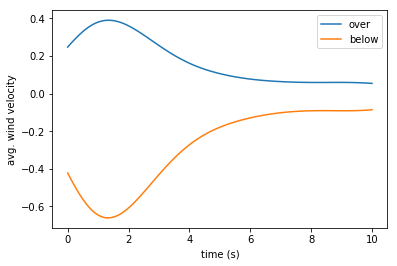

In [7]:
t = np.linspace(0,10,D)
plt.plot(t, X_over, label="over")
plt.plot(t, X_below, label="below")
plt.xlabel("time (s)")
plt.ylabel("avg. wind velocity")
plt.legend()
plt.show()

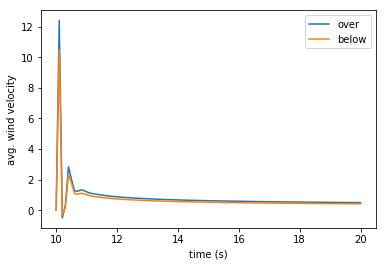

In [10]:
t = np.linspace(10,20,D)
plt.plot(t, Vx_over, label="over")
plt.plot(t, Vx_below, label="below")
plt.xlabel("time (s)")
plt.ylabel("avg. wind velocity")
plt.legend()
plt.show()